In [1]:
import torch

torch.manual_seed(42)

device_id = 2
using = 0.4
device = torch.device(f"cuda:{device_id}" if torch.cuda.is_available() else "cpu")

# torch.cuda.set_per_process_memory_fraction(using, device_id)
# # GPU 메모리 사용 비율 설정
# torch.cuda.empty_cache()
# # 총 메모리가 얼마나 되는지 계산
# total_memory = torch.cuda.get_device_properties(device_id).total_memory
# # GPU 메모리의 49.9% 사용:
# tmp_tensor = torch.empty(int(total_memory * (using-0.001)), dtype=torch.int8, device=device)
# print(f'use:{tmp_tensor}')

import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data.sampler import WeightedRandomSampler

from LoadData import load_data, train_model, show_result

3379
Class: A, Count: 1401
Class: B, Count: 739
Class: C, Count: 695
Class: F, Count: 544
846
Class: A, Count: 351
Class: B, Count: 185
Class: C, Count: 175
Class: F, Count: 135
A  A  A  C  B  F  F  A


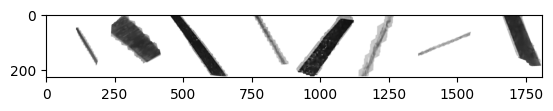

In [2]:
dataloaders_dict = load_data()

import matplotlib.pyplot as plt
import numpy as np
import torchvision

# 인라인 이미지 표시를 위한 헬퍼 함수
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # 정규화 해제
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

classes = ('A', 'B', 'C', 'F')
        
dataiter = iter(dataloaders_dict['train'])
images, labels = next(dataiter)

# 이미지를 격자로 생성하고 표시
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('  '.join(classes[labels[j]] for j in range(8)))

In [3]:
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

In [17]:
use_pretrained= True
net = models.wide_resnet50_2(pretrained=use_pretrained)

net.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
net.fc = nn.Linear(in_features=2048, out_features=4, bias=True)

optimizer = optim.SGD(params=net.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()
net = net.to(device)
# train_model 함수 실행
num_epochs = 50
result = train_model(net, dataloaders_dict, criterion, optimizer, 
                     num_epochs=num_epochs, save_model='./Model/wide_resnet50_2.pth',
                     device=device)

Epoch 1/ 50
******************************


  0%|          | 0/106 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100%|██████████| 106/106 [00:04<00:00, 25.50it/s]


max val acc:0.2624113475177305, save in ./Model/wide_resnet50_2.pth
val Loss 1.3886 Acc : 0.2624
Epoch 2/ 50
******************************


100%|██████████| 423/423 [00:32<00:00, 13.04it/s]


train Loss 1.0804 Acc : 0.5218


100%|██████████| 106/106 [00:03<00:00, 26.90it/s]


max val acc:0.640661938534279, save in ./Model/wide_resnet50_2.pth
val Loss 0.9488 Acc : 0.6407
Epoch 3/ 50
******************************


100%|██████████| 423/423 [00:30<00:00, 13.65it/s]


train Loss 0.7765 Acc : 0.6922


100%|██████████| 106/106 [00:03<00:00, 26.72it/s]


max val acc:0.652482269503546, save in ./Model/wide_resnet50_2.pth
val Loss 0.9685 Acc : 0.6525
Epoch 4/ 50
******************************


100%|██████████| 423/423 [00:28<00:00, 14.89it/s]


train Loss 0.5706 Acc : 0.7712


100%|██████████| 106/106 [00:03<00:00, 26.71it/s]


max val acc:0.7836879432624113, save in ./Model/wide_resnet50_2.pth
val Loss 0.5540 Acc : 0.7837
Epoch 5/ 50
******************************


100%|██████████| 423/423 [00:29<00:00, 14.35it/s]


train Loss 0.5304 Acc : 0.8026


100%|██████████| 106/106 [00:04<00:00, 25.85it/s]


max val acc:0.8156028368794326, save in ./Model/wide_resnet50_2.pth
val Loss 0.4976 Acc : 0.8156
Epoch 6/ 50
******************************


100%|██████████| 423/423 [00:29<00:00, 14.45it/s]


train Loss 0.3641 Acc : 0.8656


100%|██████████| 106/106 [00:04<00:00, 25.99it/s]


max val acc:0.8475177304964538, save in ./Model/wide_resnet50_2.pth
val Loss 0.4605 Acc : 0.8475
Epoch 7/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 16.13it/s]


train Loss 0.3280 Acc : 0.8810


100%|██████████| 106/106 [00:03<00:00, 27.29it/s]


val Loss 0.7750 Acc : 0.7494
Epoch 8/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 16.01it/s]


train Loss 0.2860 Acc : 0.8976


100%|██████████| 106/106 [00:04<00:00, 26.37it/s]


val Loss 0.6617 Acc : 0.8168
Epoch 9/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 16.01it/s]


train Loss 0.2115 Acc : 0.9213


100%|██████████| 106/106 [00:03<00:00, 26.66it/s]


val Loss 0.5726 Acc : 0.8251
Epoch 10/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 16.01it/s]


train Loss 0.1819 Acc : 0.9355


100%|██████████| 106/106 [00:04<00:00, 26.27it/s]


val Loss 0.5336 Acc : 0.8416
Epoch 11/ 50
******************************


100%|██████████| 423/423 [00:27<00:00, 15.14it/s]


train Loss 0.1631 Acc : 0.9420


100%|██████████| 106/106 [00:03<00:00, 26.58it/s]


val Loss 0.5179 Acc : 0.8452
Epoch 12/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 15.97it/s]


train Loss 0.1473 Acc : 0.9497


100%|██████████| 106/106 [00:04<00:00, 23.04it/s]


val Loss 1.0119 Acc : 0.7258
Epoch 13/ 50
******************************


100%|██████████| 423/423 [00:29<00:00, 14.49it/s]


train Loss 0.1088 Acc : 0.9645


100%|██████████| 106/106 [00:04<00:00, 22.83it/s]


val Loss 0.5208 Acc : 0.8452
Epoch 14/ 50
******************************


100%|██████████| 423/423 [00:30<00:00, 13.99it/s]


train Loss 0.1418 Acc : 0.9544


100%|██████████| 106/106 [00:03<00:00, 26.96it/s]


max val acc:0.8486997635933806, save in ./Model/wide_resnet50_2.pth
val Loss 0.5673 Acc : 0.8487
Epoch 15/ 50
******************************


100%|██████████| 423/423 [00:27<00:00, 15.52it/s]


train Loss 0.0992 Acc : 0.9657


100%|██████████| 106/106 [00:03<00:00, 26.53it/s]


val Loss 0.8350 Acc : 0.7884
Epoch 16/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 16.15it/s]


train Loss 0.0865 Acc : 0.9710


100%|██████████| 106/106 [00:04<00:00, 25.76it/s]


val Loss 0.6857 Acc : 0.8475
Epoch 17/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 15.88it/s]


train Loss 0.0605 Acc : 0.9834


100%|██████████| 106/106 [00:04<00:00, 25.91it/s]


val Loss 0.6297 Acc : 0.8251
Epoch 18/ 50
******************************


100%|██████████| 423/423 [00:27<00:00, 15.52it/s]


train Loss 0.0614 Acc : 0.9784


100%|██████████| 106/106 [00:03<00:00, 26.78it/s]


val Loss 1.1408 Acc : 0.7388
Epoch 19/ 50
******************************


100%|██████████| 423/423 [00:27<00:00, 15.33it/s]


train Loss 0.0978 Acc : 0.9689


100%|██████████| 106/106 [00:04<00:00, 26.05it/s]


val Loss 0.6411 Acc : 0.8215
Epoch 20/ 50
******************************


100%|██████████| 423/423 [00:28<00:00, 14.88it/s]


train Loss 0.0573 Acc : 0.9828


100%|██████████| 106/106 [00:03<00:00, 26.97it/s]


max val acc:0.8628841607565012, save in ./Model/wide_resnet50_2.pth
val Loss 0.6002 Acc : 0.8629
Epoch 21/ 50
******************************


100%|██████████| 423/423 [00:28<00:00, 14.77it/s]


train Loss 0.0503 Acc : 0.9858


100%|██████████| 106/106 [00:04<00:00, 25.45it/s]


val Loss 0.7379 Acc : 0.8002
Epoch 22/ 50
******************************


100%|██████████| 423/423 [00:28<00:00, 14.79it/s]


train Loss 0.0560 Acc : 0.9843


100%|██████████| 106/106 [00:04<00:00, 26.24it/s]


val Loss 0.7252 Acc : 0.8357
Epoch 23/ 50
******************************


100%|██████████| 423/423 [00:28<00:00, 14.91it/s]


train Loss 0.0515 Acc : 0.9814


100%|██████████| 106/106 [00:03<00:00, 26.90it/s]


val Loss 0.6941 Acc : 0.8274
Epoch 24/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 16.12it/s]


train Loss 0.0268 Acc : 0.9920


100%|██████████| 106/106 [00:03<00:00, 26.80it/s]


max val acc:0.8676122931442081, save in ./Model/wide_resnet50_2.pth
val Loss 0.6032 Acc : 0.8676
Epoch 25/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 15.92it/s]


train Loss 0.0345 Acc : 0.9920


100%|██████████| 106/106 [00:03<00:00, 26.87it/s]


val Loss 0.6970 Acc : 0.8416
Epoch 26/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 15.93it/s]


train Loss 0.0652 Acc : 0.9808


100%|██████████| 106/106 [00:04<00:00, 25.61it/s]


val Loss 1.0737 Acc : 0.7991
Epoch 27/ 50
******************************


100%|██████████| 423/423 [00:27<00:00, 15.39it/s]


train Loss 0.0564 Acc : 0.9828


100%|██████████| 106/106 [00:04<00:00, 25.94it/s]


val Loss 0.7373 Acc : 0.8369
Epoch 28/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 15.77it/s]


train Loss 0.0452 Acc : 0.9870


100%|██████████| 106/106 [00:04<00:00, 26.23it/s]


val Loss 0.6346 Acc : 0.8487
Epoch 29/ 50
******************************


100%|██████████| 423/423 [00:27<00:00, 15.39it/s]


train Loss 0.0473 Acc : 0.9843


100%|██████████| 106/106 [00:04<00:00, 26.35it/s]


val Loss 0.7265 Acc : 0.8322
Epoch 30/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 15.92it/s]


train Loss 0.0120 Acc : 0.9973


100%|██████████| 106/106 [00:03<00:00, 26.92it/s]


val Loss 0.8084 Acc : 0.8487
Epoch 31/ 50
******************************


100%|██████████| 423/423 [00:27<00:00, 15.20it/s]


train Loss 0.0032 Acc : 0.9997


100%|██████████| 106/106 [00:03<00:00, 26.78it/s]


val Loss 0.6387 Acc : 0.8629
Epoch 32/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 15.79it/s]


train Loss 0.0262 Acc : 0.9920


100%|██████████| 106/106 [00:04<00:00, 25.61it/s]


val Loss 0.6848 Acc : 0.8499
Epoch 33/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 15.80it/s]


train Loss 0.0155 Acc : 0.9953


100%|██████████| 106/106 [00:04<00:00, 25.95it/s]


val Loss 1.1263 Acc : 0.7896
Epoch 34/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 16.10it/s]


train Loss 0.0441 Acc : 0.9861


100%|██████████| 106/106 [00:03<00:00, 26.77it/s]


val Loss 0.9170 Acc : 0.8085
Epoch 35/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 15.92it/s]


train Loss 0.0524 Acc : 0.9846


100%|██████████| 106/106 [00:04<00:00, 25.90it/s]


val Loss 0.8832 Acc : 0.8097
Epoch 36/ 50
******************************


100%|██████████| 423/423 [00:27<00:00, 15.19it/s]


train Loss 0.0120 Acc : 0.9962


100%|██████████| 106/106 [00:04<00:00, 25.66it/s]


max val acc:0.8900709219858156, save in ./Model/wide_resnet50_2.pth
val Loss 0.5905 Acc : 0.8901
Epoch 37/ 50
******************************


100%|██████████| 423/423 [00:27<00:00, 15.33it/s]


train Loss 0.0072 Acc : 0.9976


100%|██████████| 106/106 [00:04<00:00, 25.84it/s]


val Loss 0.7462 Acc : 0.8605
Epoch 38/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 15.85it/s]


train Loss 0.0054 Acc : 0.9985


100%|██████████| 106/106 [00:03<00:00, 26.69it/s]


val Loss 0.6612 Acc : 0.8676
Epoch 39/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 15.68it/s]


train Loss 0.0018 Acc : 0.9997


100%|██████████| 106/106 [00:03<00:00, 26.99it/s]


val Loss 0.6747 Acc : 0.8605
Epoch 40/ 50
******************************


100%|██████████| 423/423 [00:27<00:00, 15.11it/s]


train Loss 0.0036 Acc : 0.9994


100%|██████████| 106/106 [00:03<00:00, 26.68it/s]


val Loss 0.6376 Acc : 0.8747
Epoch 41/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 16.04it/s]


train Loss 0.0026 Acc : 0.9994


100%|██████████| 106/106 [00:03<00:00, 26.83it/s]


val Loss 0.7188 Acc : 0.8534
Epoch 42/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 15.83it/s]


train Loss 0.0049 Acc : 0.9988


100%|██████████| 106/106 [00:03<00:00, 26.72it/s]


val Loss 0.6453 Acc : 0.8558
Epoch 43/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 15.95it/s]


train Loss 0.0034 Acc : 0.9991


100%|██████████| 106/106 [00:03<00:00, 27.01it/s]


val Loss 0.9010 Acc : 0.8511
Epoch 44/ 50
******************************


100%|██████████| 423/423 [00:28<00:00, 14.76it/s]


train Loss 0.0020 Acc : 0.9994


100%|██████████| 106/106 [00:04<00:00, 22.74it/s]


val Loss 0.7464 Acc : 0.8392
Epoch 45/ 50
******************************


100%|██████████| 423/423 [00:27<00:00, 15.31it/s]


train Loss 0.0035 Acc : 0.9988


100%|██████████| 106/106 [00:03<00:00, 26.57it/s]


val Loss 0.7237 Acc : 0.8558
Epoch 46/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 15.95it/s]


train Loss 0.0283 Acc : 0.9932


100%|██████████| 106/106 [00:03<00:00, 27.23it/s]


val Loss 1.0761 Acc : 0.7931
Epoch 47/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 16.04it/s]


train Loss 0.0230 Acc : 0.9935


100%|██████████| 106/106 [00:03<00:00, 26.75it/s]


val Loss 0.8105 Acc : 0.8262
Epoch 48/ 50
******************************


100%|██████████| 423/423 [00:27<00:00, 15.22it/s]


train Loss 0.0098 Acc : 0.9967


100%|██████████| 106/106 [00:04<00:00, 24.65it/s]


val Loss 0.6773 Acc : 0.8664
Epoch 49/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 15.78it/s]


train Loss 0.0124 Acc : 0.9967


100%|██████████| 106/106 [00:03<00:00, 26.54it/s]


val Loss 0.7275 Acc : 0.8463
Epoch 50/ 50
******************************


100%|██████████| 423/423 [00:26<00:00, 16.14it/s]


train Loss 0.0154 Acc : 0.9962


100%|██████████| 106/106 [00:04<00:00, 26.23it/s]

val Loss 1.0858 Acc : 0.8085


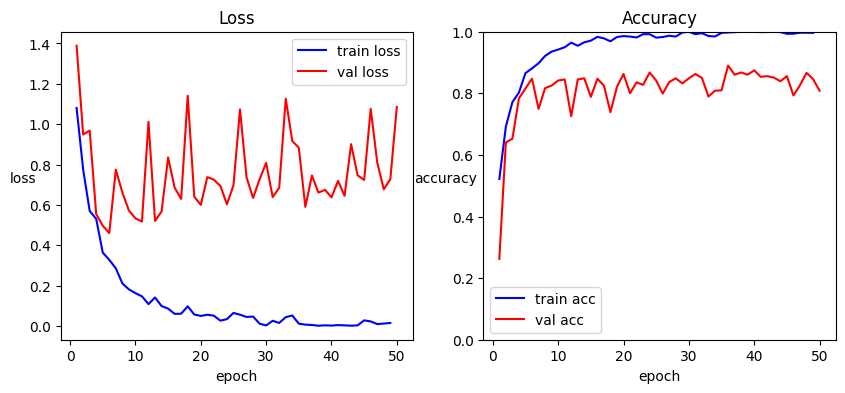

In [18]:
show_result(result)

import json
# 딕셔너리를 JSON 파일로 저장
with open('./Model/wide_resnet50_2.json', 'w') as f:
    json.dump(result, f)